**Importar librerias**

### Importando librerías y cargando datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_application = pd.read_csv('/content/drive/MyDrive/Modelos 2/application_record.csv', sep=',')
df_credit = pd.read_csv('/content/drive/MyDrive/Modelos 2/credit_record.csv', sep=',')

In [ ]:
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C



### Exploración de los datos

In [ ]:
df = pd.merge(df_application, df_credit, on='ID', how='inner')
df = df.head(77000)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76995,5023387,M,N,Y,0,83250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20889,365243,1,0,0,0,NaN,2.0,-4,0
76996,5023387,M,N,Y,0,83250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20889,365243,1,0,0,0,NaN,2.0,-5,0
76997,5023389,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,House / apartment,-13536,-2092,1,0,0,0,Core staff,4.0,0,0
76998,5023389,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,House / apartment,-13536,-2092,1,0,0,0,Core staff,4.0,-1,0


In [ ]:
df = df.head(77000)


In [ ]:
df['STATUS'].describe()

count     77000
unique        8
top           C
freq      32713
Name: STATUS, dtype: object

#### Organizamos nuestra variable objetivo en solo dos clases

Clase 0: La persona se encuentra retrasada en los pagos

Clase 1: La persona se encuentra al día con sus pagos

In [ ]:
#Vemos los valores unicos de nuestra variable objetivo
valores_unicos_status = df['STATUS'].unique()
valores_unicos_status

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

In [ ]:
#Pasamos la columna "STATUS" a dos clases numericas
mappings = {'0': 0, '1': 0, '2': 0,'3': 0,'4': 0,'5': 0,'C': 1,'X': 1}
df['STATUS'] = df['STATUS'].replace(mappings)

#Vemos los valores unicos de nuestra variable objetivo
valores_unicos_status = df['STATUS'].unique()
print("valores de STATUS: ",valores_unicos_status)

valores de STATUS:  [1 0]


#### Analizamos el dataset

**Numero de muestras por clase**

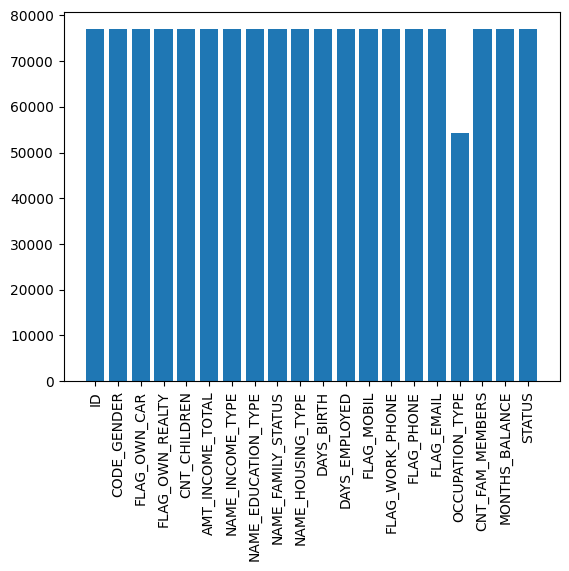

In [ ]:
counts = df.count()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77000 entries, 0 to 76999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   77000 non-null  int64  
 1   CODE_GENDER          77000 non-null  object 
 2   FLAG_OWN_CAR         77000 non-null  object 
 3   FLAG_OWN_REALTY      77000 non-null  object 
 4   CNT_CHILDREN         77000 non-null  int64  
 5   AMT_INCOME_TOTAL     77000 non-null  float64
 6   NAME_INCOME_TYPE     77000 non-null  object 
 7   NAME_EDUCATION_TYPE  77000 non-null  object 
 8   NAME_FAMILY_STATUS   77000 non-null  object 
 9   NAME_HOUSING_TYPE    77000 non-null  object 
 10  DAYS_BIRTH           77000 non-null  int64  
 11  DAYS_EMPLOYED        77000 non-null  int64  
 12  FLAG_MOBIL           77000 non-null  int64  
 13  FLAG_WORK_PHONE      77000 non-null  int64  
 14  FLAG_PHONE           77000 non-null  int64  
 15  FLAG_EMAIL           77000 non-null 

In [ ]:
print(df.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005

In [ ]:
conteo_clases = df['STATUS'].value_counts()
print(conteo_clases)


1    46807
0    30193
Name: STATUS, dtype: int64


**Distribución de muestras por clase**

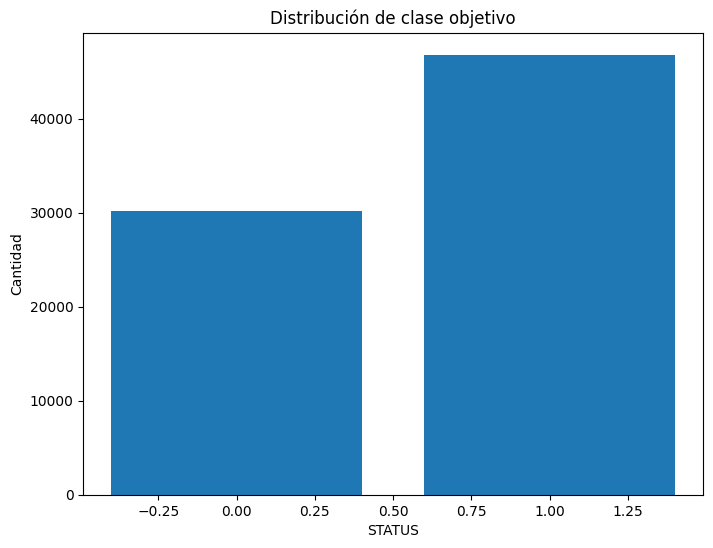

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(conteo_clases.index, conteo_clases.values)
plt.xlabel('STATUS')
plt.ylabel('Cantidad')
plt.title('Distribución de clase objetivo')
plt.show()

In [ ]:
columnas_clase = df.columns


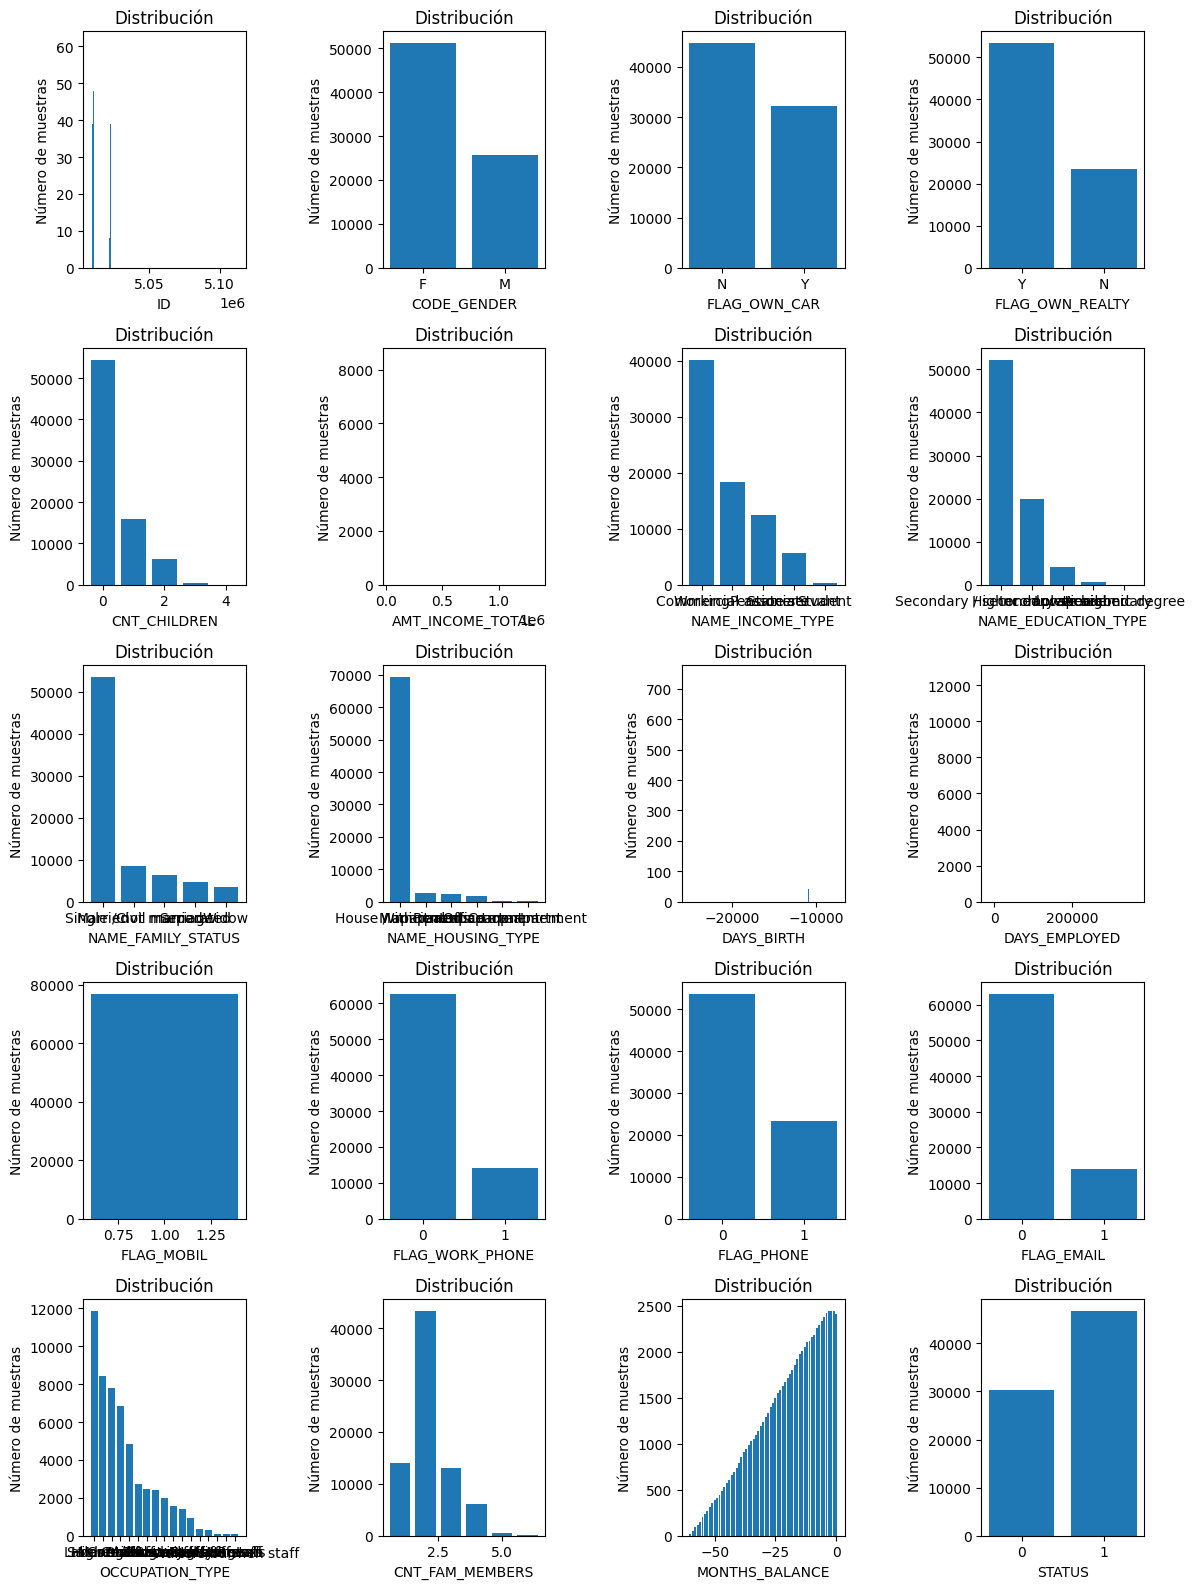

In [ ]:


# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 16))
axes = axes.flatten()

# Iterar sobre las columnas de clase
for i, columna in enumerate(columnas_clase):
    # Calcular el número de muestras por clase
    muestras_por_clase = df[columna].value_counts()
    
    # Crear el gráfico de barras correspondiente
    axes[i].bar(muestras_por_clase.index, muestras_por_clase.values)
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Número de muestras')
    axes[i].set_title(f'Distribución')
    
# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
print(df.describe())

                 ID  CNT_CHILDREN  AMT_INCOME_TOTAL    DAYS_BIRTH  \
count  7.700000e+04  77000.000000      7.700000e+04  77000.000000   
mean   5.018476e+06      0.387156      1.981337e+05 -16110.519325   
std    1.603143e+04      0.665748      1.160436e+05   4080.488418   
min    5.008804e+06      0.000000      3.330000e+04 -25140.000000   
25%    5.009967e+06      0.000000      1.350000e+05 -19575.000000   
50%    5.018482e+06      0.000000      1.800000e+05 -15527.000000   
75%    5.022325e+06      1.000000      2.295000e+05 -12615.000000   
max    5.113233e+06      4.000000      1.350000e+06  -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE    FLAG_PHONE    FLAG_EMAIL  \
count   77000.000000     77000.0     77000.000000  77000.000000  77000.000000   
mean    56737.697351         1.0         0.185117      0.302429      0.180273   
std    135663.468957         0.0         0.388395      0.459313      0.384417   
min    -14127.000000         1.0         0.000000     

In [ ]:
df.isnull().sum()


ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        22788
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
STATUS                     0
dtype: int64

#### Matriz de correlación

<ipython-input-20-ba4d1cb273d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


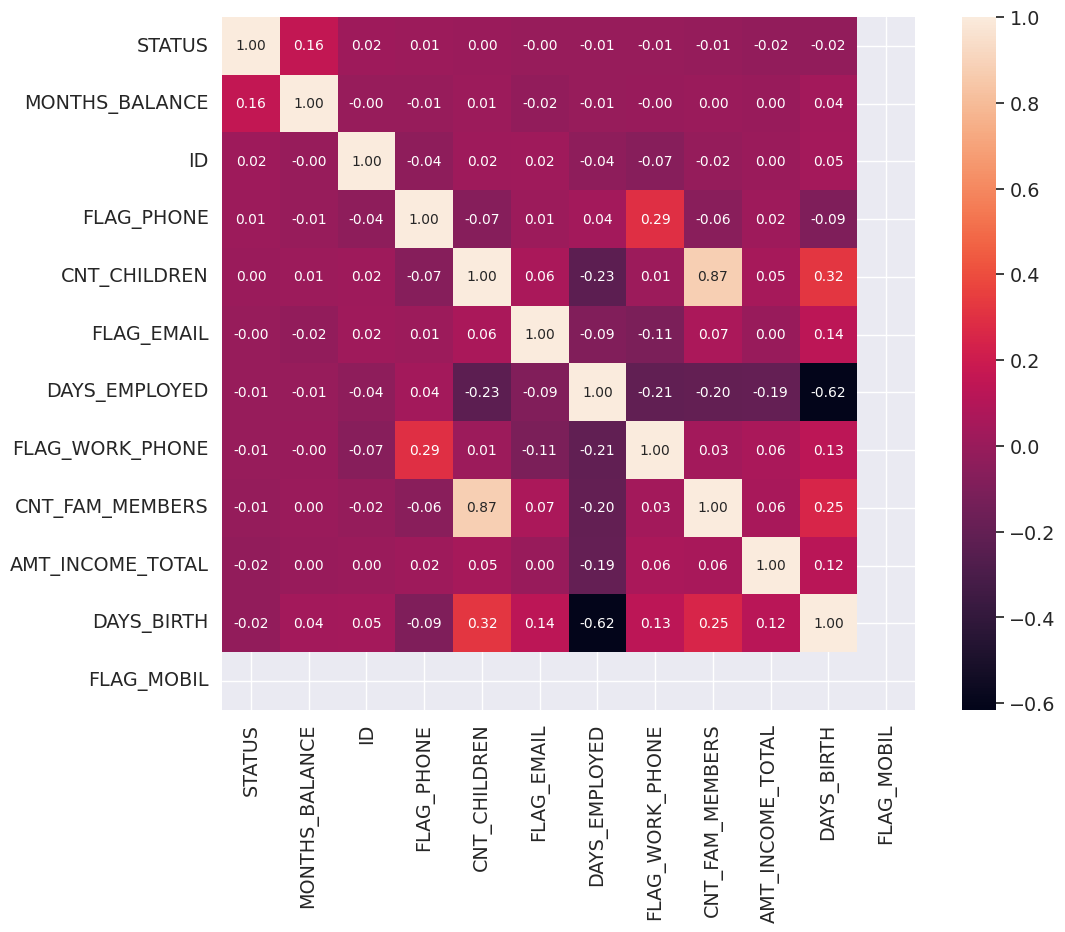

In [ ]:
k = 20
corrmat = df.corr()
cols = corrmat.nlargest(k, 'STATUS')['STATUS'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

#### Eliminar variables con un solo tipo de dato

In [ ]:
# Obtener el conteo de clases para cada variable
class_counts = df.apply(lambda x: x.value_counts().shape[0])

# Mostrar el conteo de clases para cada variable
print(class_counts)


ID                     3661
CODE_GENDER               2
FLAG_OWN_CAR              2
FLAG_OWN_REALTY           2
CNT_CHILDREN              5
AMT_INCOME_TOTAL         93
NAME_INCOME_TYPE          5
NAME_EDUCATION_TYPE       5
NAME_FAMILY_STATUS        5
NAME_HOUSING_TYPE         6
DAYS_BIRTH              765
DAYS_EMPLOYED           434
FLAG_MOBIL                1
FLAG_WORK_PHONE           2
FLAG_PHONE                2
FLAG_EMAIL                2
OCCUPATION_TYPE          17
CNT_FAM_MEMBERS           6
MONTHS_BALANCE           61
STATUS                    2
dtype: int64


In [ ]:
# Eliminar la columna 'Flag_Mobil' del DataFrame 'df'
df = df.drop('FLAG_MOBIL', axis=1)

# Verificar el DataFrame después de eliminar la columna
print(df.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  \
0  Rented apartment      -12005

#### Valores faltantes

In [ ]:
def getMissingValues(df):
  all_data_na = (df.isnull().sum() / len(df)) * 100
  all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:]
  missing_data = pd.DataFrame({'% Faltantes' :all_data_na})
  return missing_data

In [ ]:
getMissingValues(df)

,% Faltantes
OCCUPATION_TYPE,29.594805


### Preprocesamiento de datos

Se ópta por trabajar con la versión normalizada de la clase de salida y por llenar los valores faltante de la unica variable con este caracteristica.

---



*Llenando* valores faltantes

In [ ]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('None')


In [ ]:
getMissingValues(df)


,% Faltantes


In [ ]:
#Variables categoricas
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

In [ ]:
# Variables numericas
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

Convertimos las variables categoricas a numericas

In [ ]:
enc = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)


Correción de desbalance con SMOTE

In [ ]:
# Obtener las características y la variable objetivo
X = df.drop('STATUS', axis=1) 
y = df['STATUS']

# Aplicar SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con las muestras sintéticas
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['STATUS'])], axis=1)

# Verificar los resultados
print("Tamaño del conjunto de datos original:", df.shape)
print("Tamaño del conjunto de datos después de aplicar SMOTE:", df_resampled.shape)
df=df_resampled

Tamaño del conjunto de datos original: (77000, 19)
Tamaño del conjunto de datos después de aplicar SMOTE: (93614, 19)


### Muestreo de datos

In [ ]:
def splitData(df):
  X = df.iloc[:, :-1]
  y = df.iloc[:,-1:]
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2)
  return Xtrain, Xtest, Ytrain, Ytest, X, y

In [ ]:
Xtrain, Xtest, Ytrain, Ytest, x, y = splitData(df)
print(df.shape, Xtrain.shape, Xtest.shape, Ytrain.shape)


(93614, 19) (74891, 18) (18723, 18) (74891, 1)


In [ ]:
#Estandarizado
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Validación




In [ ]:
def validate(y_true, y_pred, show_r = False):
  # Calcular la precisión (accuracy)
  accuracy = accuracy_score(y_true, y_pred)

  # Calcular la precisión por clase
  precision = precision_score(y_true, y_pred, average='weighted')

  # Calcular el recall (sensibilidad)
  recall = recall_score(y_true, y_pred, average='weighted')

  # Calcular el F1-Score
  f1 = f1_score(y_true, y_pred, average='weighted')
  if (show_r):
    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)
  else:
    return accuracy, precision, recall, f1

In [ ]:
def matrix_c(Ytest,y_pred):
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  import itertools

  # Calcular matriz de confusión
  cm = confusion_matrix(Ytest, y_pred)

  # Definir colores
  cmap = plt.cm.Blues

  # Crear figura
  plt.figure(figsize=(8, 6))

  # Crear matriz de confusión
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Matriz de Confusión')
  plt.colorbar()

  # Añadir etiquetas a los ejes
  tick_marks = np.arange(len(set(Ytest)))
  plt.xticks(tick_marks, set(Ytest))
  plt.yticks(tick_marks, set(Ytest))

  # Añadir números a la matriz de confusión
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(int(cm[i, j]), 'd'),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  # Ajustar diseño y mostrar figura
  plt.tight_layout()
  plt.ylabel('Etiqueta Verdadera')
  plt.xlabel('Etiqueta Predicha')
  plt.show()
  return plt.show()


In [ ]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,11,2.0,0,1
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,11,2.0,-1,1
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,11,2.0,-2,1
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,11,2.0,-3,1
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,11,2.0,-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93609,5022190,0,1,1,1,94500.0,4,4,1,1,-19780,-6849,0,0,0,9,3.0,-23,0
93610,5021860,0,1,1,1,315000.0,2,1,4,1,-18233,-425,0,1,1,11,2.0,-39,0
93611,5023285,1,1,1,0,189000.0,4,4,1,1,-16127,-3461,0,0,0,3,2.0,-13,0
93612,5021837,0,1,1,1,157500.0,0,4,1,1,-11938,-2162,0,0,0,0,3.0,-13,0


### Modelos

#### Modelo Análisis Discriminante Cuadrático


In [ ]:
# Crear y entrenar el modelo de Análisis Discriminante Cuadrático
modelQDA = QuadraticDiscriminantAnalysis()
modelQDA.fit(Xtrain, Ytrain)
y_pred = modelQDA.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
validate(Ytest, y_pred , show_r= True )

accuracy:  0.5827591732094216
precision:  0.5827438688308524
recall:  0.5827591732094216
f1:  0.5827463076875138


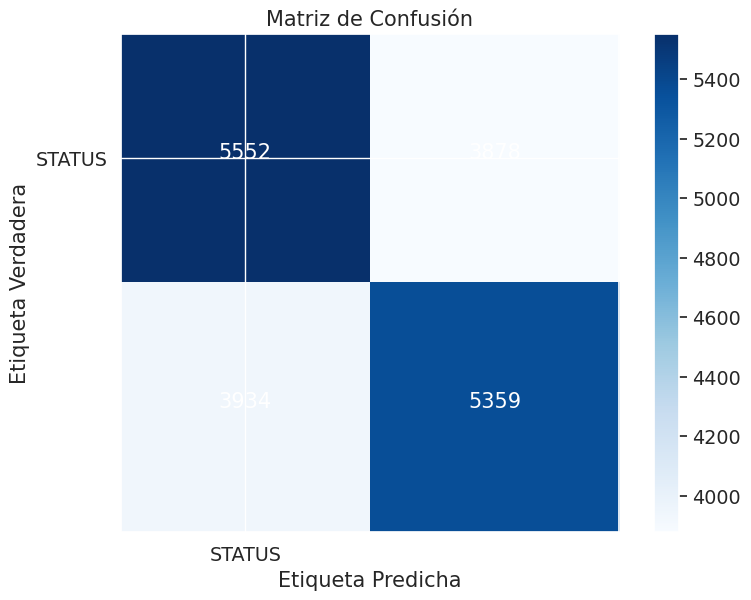

In [ ]:
matrix_c(Ytest,y_pred)

#### Modelo Ventana de Parzen (Método kernel):


In [ ]:
# Instanciar el modelo
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)

# Ajustar el modelo a los datos de entrenamiento
kde.fit(Xtrain)



KernelDensity(bandwidth=0.5)

In [ ]:
# Obtener las predicciones del modelo
threshold = 0.5
y_pred = kde.score_samples(Xtest) < threshold  # En este caso, el valor de las predicciones es el puntaje de las muestras



In [ ]:
validate(Ytest, y_pred , show_r= True )

accuracy:  0.49634139828019014
precision:  0.24635478364673435
recall:  0.49634139828019014
f1:  0.32927617177454366


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


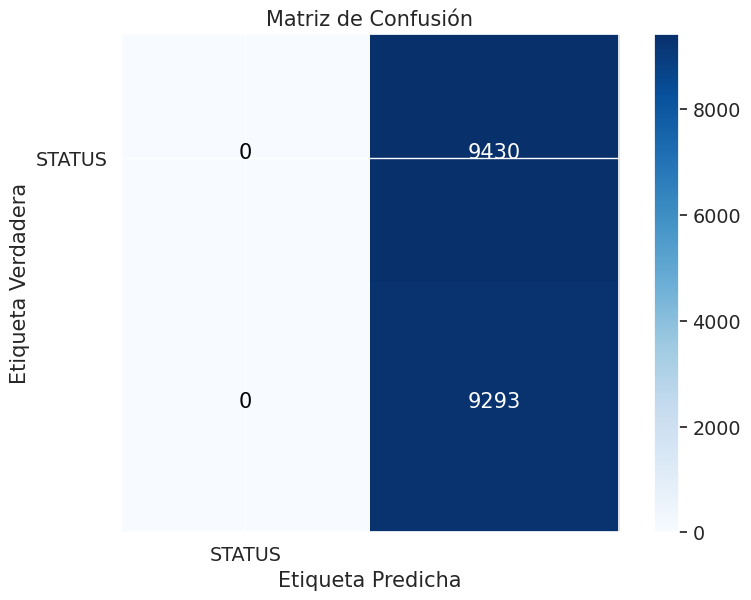

In [ ]:
matrix_c(Ytest,y_pred)

#### Modelo Gradiente Boosting Tree:


In [ ]:
# Crear y entrenar el modelo de Gradiente Boosting Tree
model = GradientBoostingClassifier()
model.fit(Xtrain, Ytrain)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(Xtest)

In [ ]:
validate(Ytest, y_pred , show_r= True )

accuracy:  0.6501094910003739
precision:  0.651185812810868
recall:  0.6501094910003739
f1:  0.649696605854226


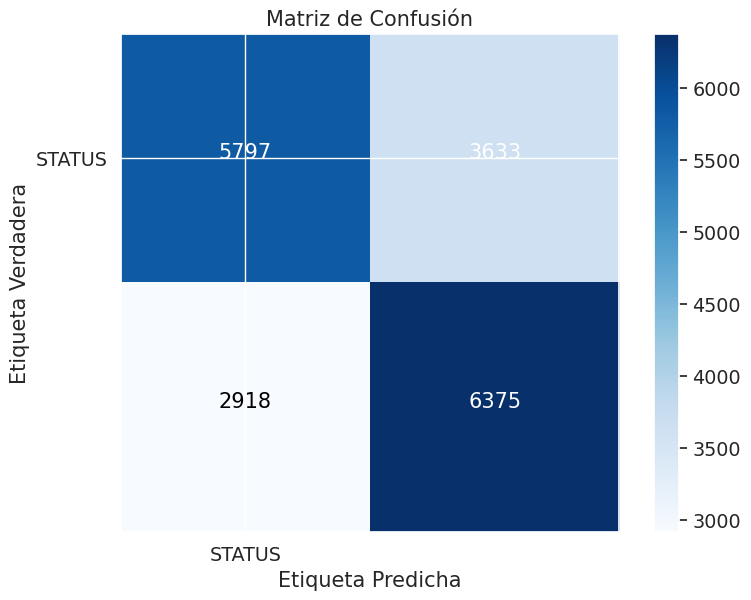

In [ ]:
matrix_c(Ytest,y_pred)

#### Modelo Redes Neuronales Artificiales:


In [ ]:
# Instanciar el modelo
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Ajustar el modelo a los datos de entrenamiento
mlp.fit(Xtrain, Ytrain)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(max_iter=1000)

In [ ]:
# Hacer predicciones sobre los datos de prueba
Ypred = mlp.predict(Xtest)

In [ ]:
validate(Ytest, Ypred , show_r= True )

accuracy:  0.7228008331998077
precision:  0.7230110050483476
recall:  0.7228008331998077
f1:  0.7227790645762004


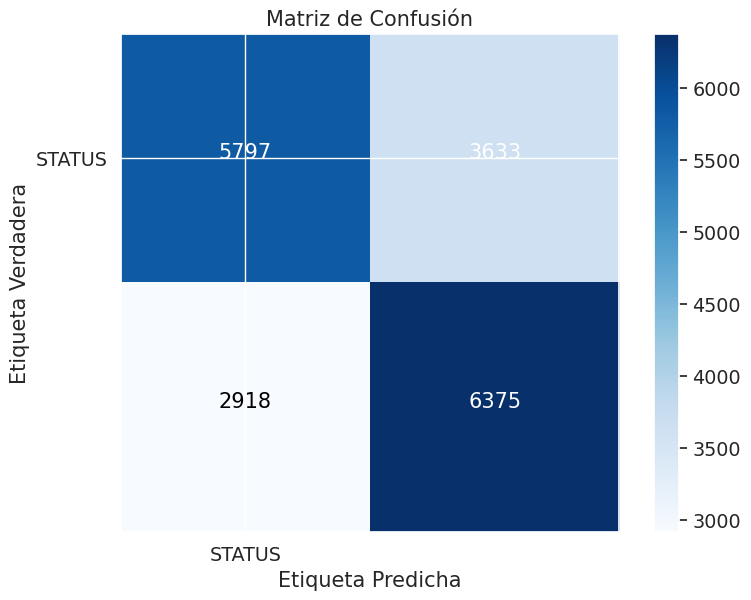

In [ ]:
matrix_c(Ytest,y_pred)

#### Modelo Máquinas de Soporte Vectorials:


In [ ]:
# Instanciar el modelo
svc = SVC(kernel='linear')

# Ajustar el modelo a los datos de entrenamiento
svc.fit(Xtrain, Ytrain)

# Hacer predicciones sobre los datos de prueba
Ypred = svc.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
validate(Ytest, Ypred , show_r= True )

accuracy:  0.5610212038669017
precision:  0.5666032491756049
recall:  0.5610212038669017
f1:  0.5535100571962713


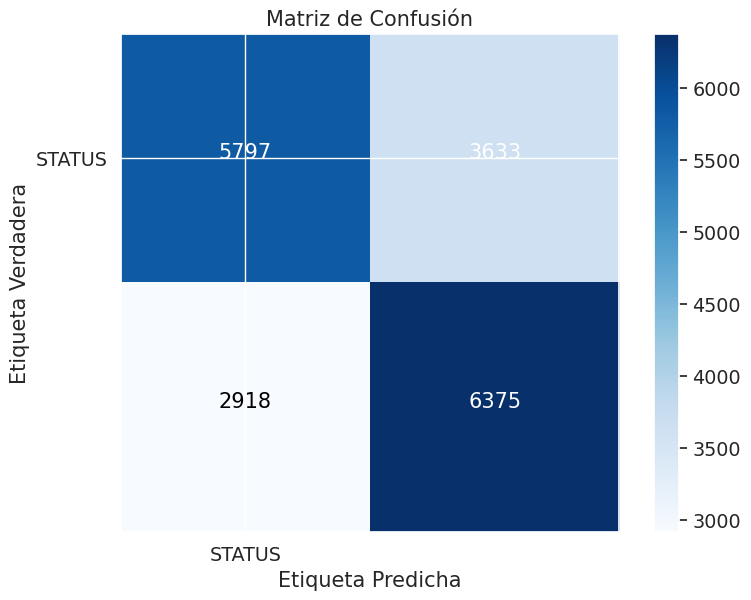

In [ ]:
matrix_c(Ytest,y_pred)

### Seleccion de Caracteristicas por el método de búsqueda secuencial


In [ ]:
# Crear y entrenar el modelo de Análisis Discriminante Cuadrático
modelQDA = QuadraticDiscriminantAnalysis()
modelQDA.fit(Xtrain, Ytrain)
y_pred = modelQDA.predict(Xtest)
validate(Ytest, y_pred , show_r= True )

accuracy:  0.5827591732094216
precision:  0.5827438688308524
recall:  0.5827591732094216
f1:  0.5827463076875138


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator=modelQDA, direction='forward')
# Selección de características
X_train_selected = sfs.fit_transform(Xtrain, Ytrain)
X_test_selected = sfs.transform(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:

#### Modelo Análisis Discriminante Cuadrático

In [ ]:
# Crear y entrenar el modelo de Análisis Discriminante Cuadrático
modelQDA = QuadraticDiscriminantAnalysis()
modelQDA.fit(X_train_selected, Ytrain)
predicted_value = modelQDA.predict(X_test_selected)
validate(Ytest, predicted_value, show_r=True)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:  0.5664690487635529
precision:  0.5688739223692764
recall:  0.5664690487635529
f1:  0.5637486508516506


#### Modelo Gradiente Boosting Tree

In [ ]:
# Crear una instancia del modelo Gradient Boosting Tree
model_gb = GradientBoostingClassifier()

model_gb.fit(X_train_selected, Ytrain)

# Realizar predicciones en el conjunto de prueba
predicted_value = model_gb.predict(X_test_selected)

validate(Ytest, predicted_value, show_r=True)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:  0.6189179084548416
precision:  0.6210593340854663
recall:  0.6189179084548416
f1:  0.6176642838908226


#### Modelo Redes Neuronales Artificiales

In [ ]:

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Ajustar el modelo a los datos de entrenamiento
mlp.fit(X_train_selected, Ytrain)

# Hacer predicciones sobre los datos de prueba
predicted_value = mlp.predict(X_test_selected)

validate(Ytest, predicted_value, show_r=True)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:  0.6879773540565081
precision:  0.6879707908358135
recall:  0.6879773540565081
f1:  0.6879644550365496


### Extracción de Caracteristicas por PCA


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

Nuestro 3 mejores modelos:

Gradiente Boosting Tree 

Redes Neuronales Artificiales

Máquinas de Soporte Vectorial

In [ ]:
# Crear una instancia de PCA
pca = PCA(n_components=0.95)  # Especifica el número de componentes principales deseados

# Ajustar y transformar los d5atos
y_log = Ytrain
X_scaled = pca.fit_transform(Xtrain)  # Aplica PCA al conjunto de entrenamiento
test_X_scaled = pca.transform(Xtest)  # Aplica PCA al conjunto de prueba


#### Modelo Análisis Discriminante Cuadrático

In [ ]:
# Crear y entrenar el modelo de Análisis Discriminante Cuadrático
modelQDA = QuadraticDiscriminantAnalysis()
modelQDA.fit(X_scaled, y_log)
predicted_value = modelQDA.predict(test_X_scaled)
validate(Ytest, predicted_value, show_r=True)

accuracy:  0.5851092239491534
precision:  0.585410341137817
recall:  0.5851092239491534
f1:  0.5849734682456892


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


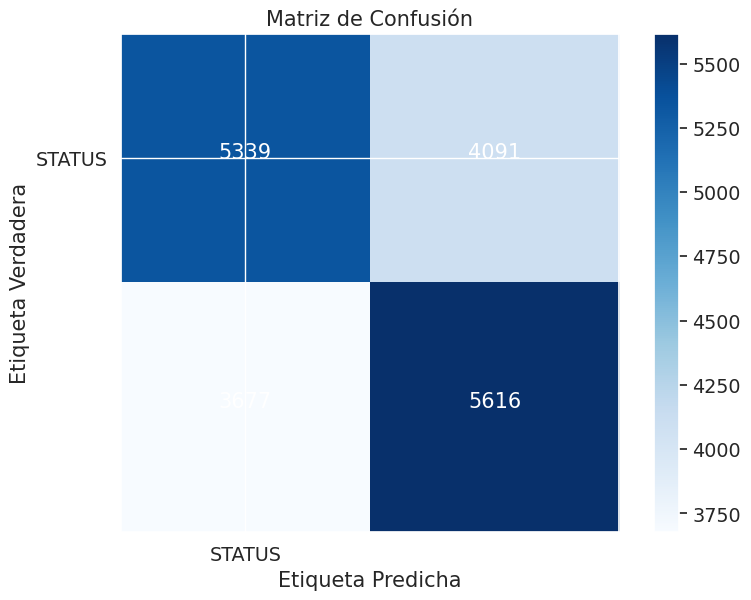

In [ ]:
matrix_c(Ytest,predicted_value)

##### Gradiente Boosting Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear una instancia del modelo Gradient Boosting Tree
model_gb = GradientBoostingClassifier()

# Entrenar el modelo utilizando los datos transformados por PCA
model_gb.fit(X_scaled, y_log)

# Realizar predicciones en el conjunto de prueba
predicted_value = model_gb.predict(test_X_scaled)

validate(Ytest, predicted_value, show_r=True)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:  0.6486674144100839
precision:  0.6493638600817893
recall:  0.6486674144100839
f1:  0.6484259236708436


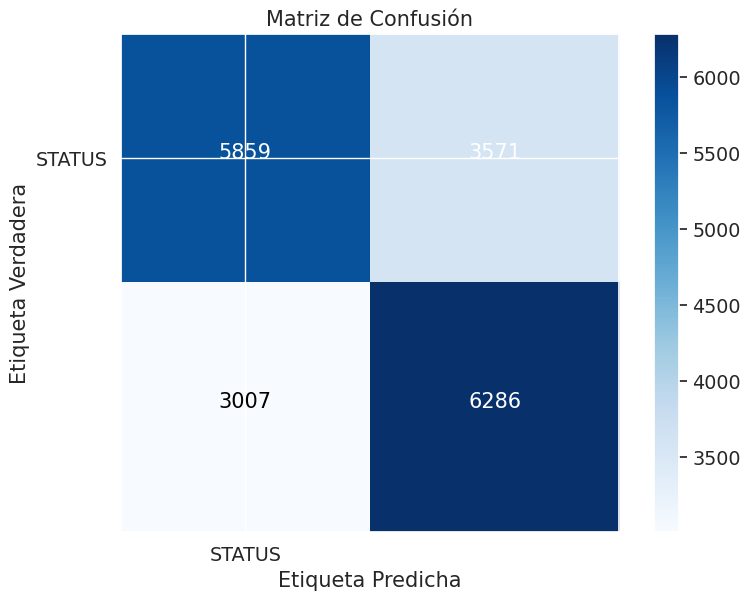

In [ ]:
matrix_c(Ytest,predicted_value)

##### Redes Neuronales Artificiales 

In [ ]:
# Instanciar el modelo
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Ajustar el modelo a los datos de entrenamiento
mlp.fit(X_scaled, y_log)

# Hacer predicciones sobre los datos de prueba
predicted_value = mlp.predict(test_X_scaled)

validate(Ytest, predicted_value, show_r=True)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:  0.7174063985472413
precision:  0.7178725751686917
recall:  0.7174063985472413
f1:  0.7173263226415603


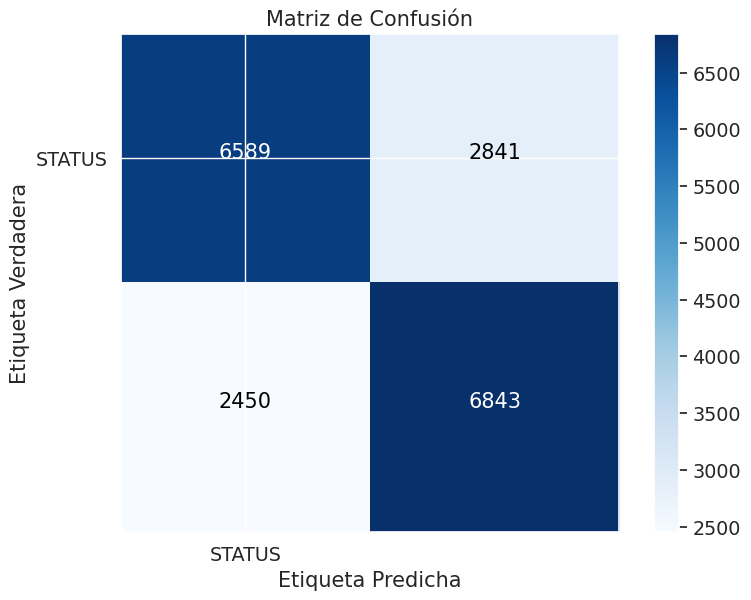

In [ ]:
matrix_c(Ytest,predicted_value)